# Byzantine
## Goal:
* Discover information about the Byzantine Emperors

# Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

# acquire
from pydataset import data
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

# Acquire
* Data acquired from kaggle
* 7 columns and 95 rows
* Each row represents one emperor
* Each column represents a feature describing that emperor

# Prepare
* Renamed columns to promote readability
* Created new column Length of reign

# Data Dictionary
| Feature | Definition |
| :- | :- |
|Start_of_reign| The year the emperor became emperor|
|End_of_reign| The year the emperor stopped being emperor|
|Year_of_birth| The year the emperor was born|
|Year_of_death| The year when the emperor died|
|Location_of_birth| Where the emperor was born|
|Location_of_death| Where the emperor died|
|Cause_of_death| What caused the emperors death|
|Dynasty| The name of the dynasty the emperor belonged to|
|Length_of_reign| How long the emperor ruled|

In [3]:
# Acquire data from kaggle csv
df = pd.read_csv('ByzantineEmperors.csv', index_col=0)
df.head()

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dinasty
Name,,,,,,,,
Constantine I,306,337,280,337,Moesia,Bithynia,Natural Causes,Constantinian
Constantine II,337,361,317,361,Pannonia,Cilicia,Natural Causes,Constantinian
Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic
Valentinian I,364,375,321,375,Panonia,Panonia,Natural Causes,Valentinian


In [4]:
# add a column that measures the length of an emerors reign
df['Length_of_reign'] = (df['End_of_reign']-df['Start_of_reign'])
# Rename a column
df = df.rename(columns={'Dinasty': 'Dynasty'})

## A brief look at the data

In [5]:
df.head()

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Constantine I,306,337,280,337,Moesia,Bithynia,Natural Causes,Constantinian,31
Constantine II,337,361,317,361,Pannonia,Cilicia,Natural Causes,Constantinian,24
Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian,2
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic,1
Valentinian I,364,375,321,375,Panonia,Panonia,Natural Causes,Valentinian,11


## A summary of the data 

In [6]:
df.describe()

,Start_of_reign,End_of_reign,Length_of_reign
count,95.000000,95.000000,95.000000
mean,866.957895,880.147368,13.189474
std,314.735685,315.495422,13.076123
min,306.000000,337.000000,0.000000
25%,625.500000,641.000000,3.000000
50%,842.000000,867.000000,8.000000
75%,1099.500000,1130.500000,21.500000
max,1449.000000,1453.000000,50.000000


# Exploration

([<matplotlib.axis.XTick at 0x7f922adcbdc0>,
 [Text(0, 0, 'Natural Causes'),
  Text(1, 0, 'Died on Campaign'),
  Text(2, 0, '?'),
  Text(3, 0, 'Murder'),
  Text(4, 0, 'Accident'),
  Text(5, 0, 'Illness'),
  Text(6, 0, 'Other Emperor'),
  Text(7, 0, 'Mutilated and Deposed')])

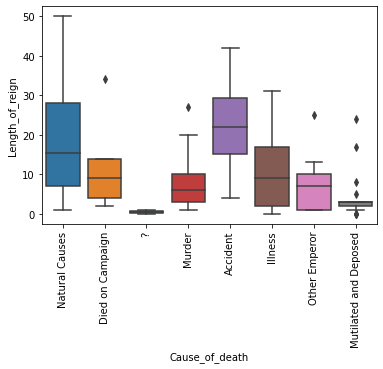

In [7]:
# The length of reign for ?
sns.boxplot(data=df, y='Length_of_reign', x='Cause_of_death')
plt.xticks(np.arange(8), rotation=90)